In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
# Wind data is from Elia for offshore wind for the month of march
#https://www.elia.be/en/grid-data/generation-data/wind-power-generation
# Spot price data is from energinet for DK2 for march
# https://www.energidataservice.dk/tso-electricity/Elspotprices

              DateTime  Week-ahead Forecast [MW]  Day-ahead forecast [MW]  \
1915  20/03/2025 22:45                    1475.5                    482.0   
1916  20/03/2025 23:00                    1512.5                    515.6   
1917  20/03/2025 23:15                    1530.0                    527.0   
1918  20/03/2025 23:30                    1547.3                    538.3   
1919  20/03/2025 23:45                    1564.4                    549.6   

      Most recent forecast [MW]  Measured & upscaled [MW]  \
1915                      624.6                    642.37   
1916                      637.4                    703.23   
1917                      656.4                    768.17   
1918                      672.2                    853.29   
1919                      688.4                    881.45   

      Monitored Capacity [MW] Active Decremental Bids [yes/no]  \
1915                   2262.1                               No   
1916                   2262.1         

Text(0.5, 1.0, 'Wind Production Data')

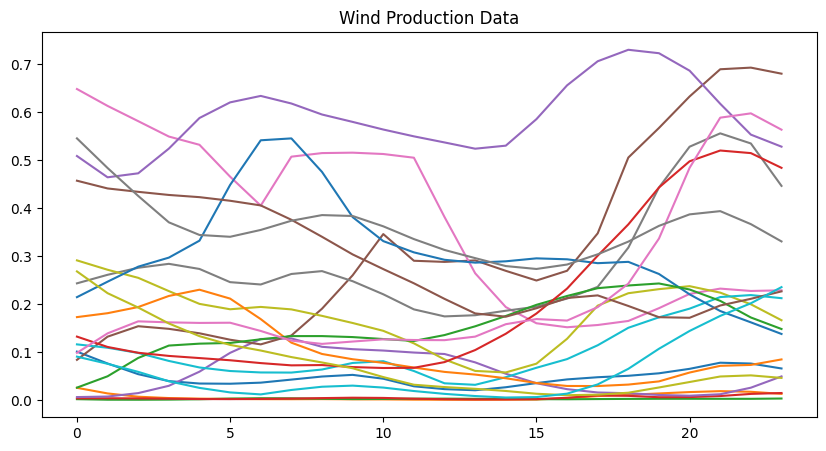

In [2]:
folder_name = 'InputData/'
# Load the wind production data and reshape it to form 20 scenarios
filename = folder_name + 'WindForecast_20250301-20250331.xls'
wind_data =  pd.read_excel(filename, skiprows=5)
resolution = 4 # Number of points per hour

# Select the first 20 days of data
wind_data = wind_data.iloc[:20*4*24, :]

print(wind_data.tail())

# Normalize the data
wind_data_da = wind_data['Day-ahead forecast [MW]'].values/2262.1
# Average the data to obtain hourly values
wind_data_da = wind_data_da.reshape(-1, resolution).mean(axis=1)
# Reshape the data to form 20 scenarios
wind_data_da = wind_data_da.reshape(20, 24).T
# Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(wind_data_da[:,:])
plt.title('Wind Production Data')

Text(0.5, 1.0, 'Spot Prices')

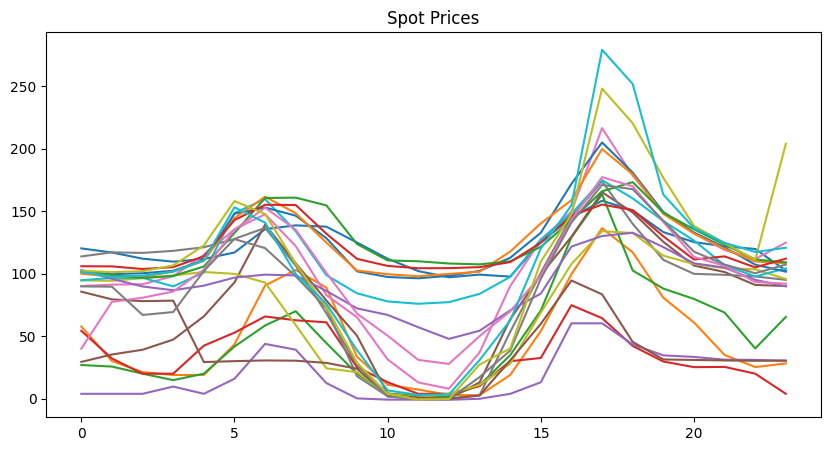

In [3]:
# Load the day-ahead spot prices
filename = folder_name + 'Elspotprices.csv'
spot_prices = pd.read_csv(filename, sep=';', decimal=',')
spot_prices = spot_prices.iloc[1:20*24+1]['SpotPriceEUR'].values
# Create scenarios
spot_prices = spot_prices.reshape(20, 24).T
# Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(spot_prices)
plt.title('Spot Prices')

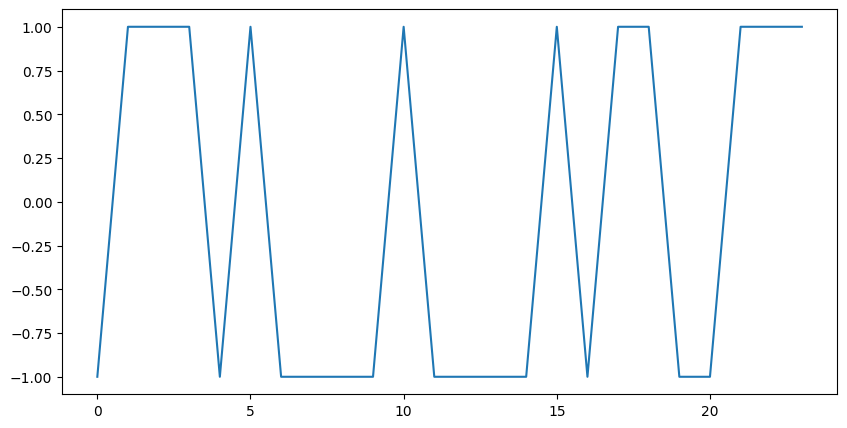

In [4]:
# Create scenarios for the imbalance using a Bernoulli distribution
n3 = 4
imbalance = -1 + 2 * np.random.binomial(1,0.5, size=(4, 24)).T
# Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(imbalance[:,0])


In [5]:
# Save the data to a pickle file
with open('InputData/Scenarios.pkl', 'wb') as f:
    pickle.dump({
        'wind_data_da': wind_data_da,
        'spot_prices': spot_prices,
        'imbalance': imbalance
    }, f)